<a href="https://colab.research.google.com/github/valenciajaime/MN2022_colabs/blob/main/Anteriores/MN2021_2_Dif_Finitas_bvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portada

**Nombre:** 

Jaime A. Valencia

Esteban Velilla

**Email:**

jalejandro.valencia@udea.edu.co

esteban.velilla@udea.edu.co

**Curso:**
Metodos numericos

**Fecha:**
Jueves 16 de septiembre del 2021

# Descripcion

**Objetivos:**

Solucion numerica de una ecuacion diferencial de segundo orden con condiciones de frontera.

Metodo de las Diferencias Finitas

**Desarrollo:**

1.   Generacion sistema lineal
2.   Solucion sistema lineal
3.   Representacion grafica


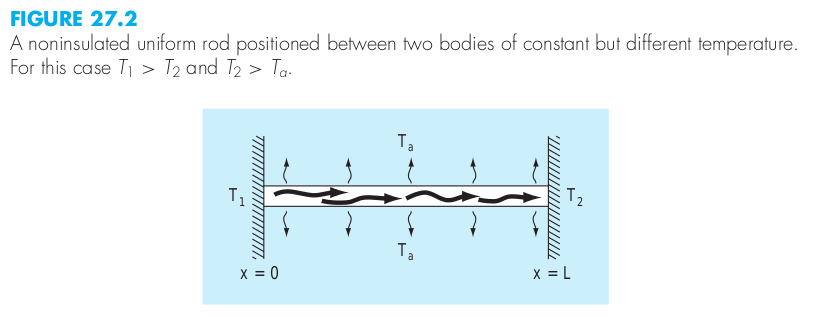

# Generacion sistema lineal



Ejemplo Chapra-Canale pag.779 9ed

$\frac{d^2T}{\partial x^2} + h(T_{a}-T)=0$

$T(0)= 40; T(L)=200$



**Diferencia finitas en 3 puntos**

$\begin{cases}Punto :x_{1} & \frac{T_{0}-2T_{1}+T_{2}}{ \Delta  ^{2} } + h*(T_{a}-T_{1}) = 0\\Punto:x_{2} & \frac{T_{1}-2T_{2}+T_{3}}{ \Delta  ^{2} } + h*(T_{a}-T_{2}) = 0\\Punto:x_{3}& \frac{T_{2}-2T_{3}+T_{4}}{ \Delta  ^{2} } + h*(T_{a}-T_{3}) = 0\end{cases} $


**Sistema lineal para 3 puntos**

$ \begin{bmatrix}-(2 + \Delta  ^{2}*h) & 1&0 \\1 & -(2 + \Delta  ^{2}*h)&1\\0&1&-(2 + \Delta  ^{2}*h) \end{bmatrix} * \begin{bmatrix}T_{1} \\T_{2} \\T_{3}\end{bmatrix} = \begin{bmatrix}-T_{0} \\0\\-T_{4}\end{bmatrix}- (\Delta  ^{2}*h*T_{a})\begin{bmatrix}1 \\1\\1\end{bmatrix}
  $




In [ ]:
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt


N_puntos = 5 #se puede seleccionar
hh = 0.01
X = np.linspace(0,10,N_puntos)

delta = X[1]-X[2]

T_a = 20
T_o = 40
T_f = 200

K_1 = T_a*hh*delta**2

##Matriz del sistema
A = diags([1, -(2+hh*delta**2), 1], [-1, 0, 1], shape=(len(X)-2, len(X)-2)).toarray()
print("Matriz sistema: \n",A)

#vector independiente
b = np.zeros(len(X)-2)
b[0]= -T_o#condicion de frontera T(0)
b[-1]=-T_f#condicion de frontera T(L)
b = b -K_1*np.ones(len(X)-2)
print("Vector sistema: \n",b)



Matriz sistema: 
 [[-2.0625  1.      0.    ]
 [ 1.     -2.0625  1.    ]
 [ 0.      1.     -2.0625]]
Vector sistema: 
 [ -41.25   -1.25 -201.25]


In [ ]:
#solucion sistema lineal

T = np.linalg.solve(A,b)
print("Solucion sistema: \n",T)

Solucion sistema: 
 [ 72.71992017 108.73483536 150.29567775]


# Representacion grafica

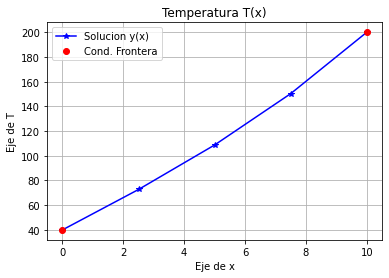

In [ ]:
#Graficar resultados usando Matplotlib
Tt = np.hstack((T_o,T,T_f))


plt.figure(1)
plt.plot(X, Tt,"b*-",[X[0],X[-1]],[T_o,T_f],"ro")
plt.legend(["Solucion y(x)","Cond. Frontera"])
plt.title('Temperatura T(x)')
plt.xlabel('Eje de x')
plt.ylabel('Eje de T')
plt.grid(True)


plt.show()

# Resultados y conclusiones

**Resultados y analisis:**


**Conclusiones:**


**Referencias:**

